<a href="https://colab.research.google.com/github/Yenuli0808/CM2604_Telco_Customer_Churn-CW/blob/main/notebooks/01_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"""
# **CM2604 Machine Learning Coursework**
Telco Customer Churn Prediction

Student Name: Yenuli Sooriyaarachchi

RGU ID:2425432

Student ID: 20241268

GitHub: https://github.com/Yenuli0808/CM2604_Telco_Customer_Churn-CW.git

"""

# **Step 01: Quick Look on Data Set(EDA)**

In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set_context("talk")
%matplotlib inline
sns.set_style('whitegrid')
from numpy._core.defchararray import title

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [25]:
# Load the dataset FROM GitHub
!wget -q https://raw.githubusercontent.com/Yenuli0808/CM2604_Telco_Customer_Churn-CW/main/data/Telco-Customer-Churn.csv?token=GHSAT0AAAAAADOPRE3ULUTW233SAFXRDM322JVDMEQ

# Load the data
df = pd.read_csv('Telco-Customer-Churn.csv')

print("✅ Dataset loaded successfully!")
print("\n=== Data set overview ===")
print(f"Dataset shape: {df.shape}")  # (rows, columns)

✅ Dataset loaded successfully!

=== Data set overview ===
Dataset shape: (7043, 21)


In [26]:
# First look at the data
print("==== FIRST 5 ROWS ====\n")
display(df.head())

==== FIRST 5 ROWS ====



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
print("==== BASIC INFO ====")
df.info()

==== BASIC INFO ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

In [28]:
print("==== MISSING VALUES ====\n")
print(df.isnull().sum())
print(df.isnull().sum()[df.isnull().sum() > 0])

==== MISSING VALUES ====

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Series([], dtype: int64)


In [29]:
print("==== DUPLICATE ROWS ====\n")
print(df.duplicated().sum())

==== DUPLICATE ROWS ====

0


In [30]:
print("==== UNIQUE VALUES ====\n")
print(df.nunique())

==== UNIQUE VALUES ====

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [31]:
print("\n=== CHECKING FOR PLACEHOLDER MISSING VALUES ===")
print("\n Unique values in each column: \n")
for col in df.columns:
    unique_vals = df[col].unique()
    if len(unique_vals) < 10:  # Only show columns with few unique values
        print(f"{col}: {unique_vals}")


=== CHECKING FOR PLACEHOLDER MISSING VALUES ===

 Unique values in each column: 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [32]:
# Total charges are often stored as object -> converting it to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

n_nan_tc=df['TotalCharges'].isna().sum()
print(f"\nNumber of NaN values in 'TotalCharges'after conversion: {n_nan_tc}")

if n_nan_tc>0:
  median_tc = df['TotalCharges'].median()
  print("Imputing TotalCharges NaN with median: ",round(median_tc,2))
  df['TotalCharges'].fillna(median_tc, inplace=True)

#ensuring Churn values are exactly yes/no
print("\nUnique values in 'Churn' column: ",df['Churn'].unique())

df['Churn_num'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Remove customerID (not used in EDA computations but keep raw file untouched)
if 'customerID' in df.columns:
    #  not permanently drop from original df; create working copy
    df_work = df.drop(columns=['customerID']).copy()
else:
    df_work = df.copy()

print("Working dataframe shape:", df_work.shape)


Number of NaN values in 'TotalCharges'after conversion: 11
Imputing TotalCharges NaN with median:  1397.47

Unique values in 'Churn' column:  ['No' 'Yes']
Working dataframe shape: (7043, 21)


/tmp/ipython-input-2987625101.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(median_tc, inplace=True)


In [33]:
# Basic Dataset Summary

numeric_cols = df_work.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df_work.select_dtypes(include=['object']).columns.tolist()
print("Numeric columns:", numeric_cols)
print("\nCategorical columns:", cat_cols)


Numeric columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_num']

Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


**Target Variable : Churn Distribution**

---



In [34]:
print("==== TARGET BALANCE ====\n")
print("\nTarget distribution (counts & percent):")
display(df_work['Churn'].value_counts())
display((df_work['Churn'].value_counts(normalize=True)*100).round(2))


==== TARGET BALANCE ====


Target distribution (counts & percent):


,count
Churn,
No,5174
Yes,1869


,proportion
Churn,
No,73.46
Yes,26.54


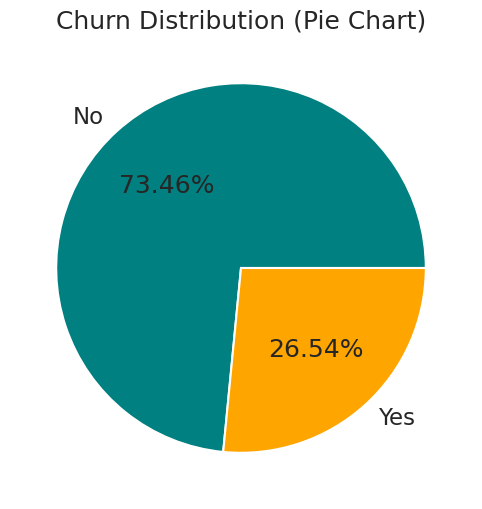


Churn = Yes[1](26.5%)
Churn = No[0](73.5%)-> Imbalnced Dataset!


In [35]:
plt.figure(figsize=(8,6))
df['Churn'].value_counts().plot(kind='pie', autopct='%1.2f%%',colors=['teal','orange'])
plt.title('Churn Distribution (Pie Chart)')
plt.ylabel('')
plt.show()

print("\nChurn = Yes[1](26.5%)")
print("Churn = No[0](73.5%)-> Imbalnced Dataset!")



/tmp/ipython-input-624848702.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette=['teal','orange'])


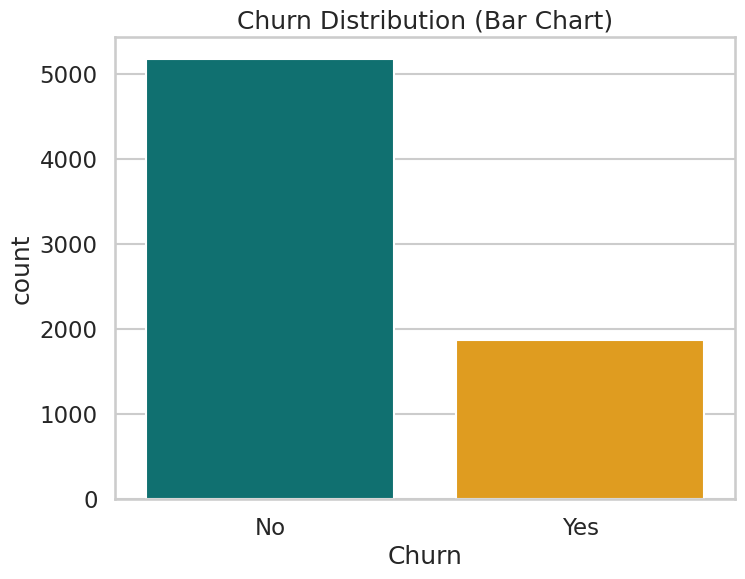

,count
Churn,
No,5174
Yes,1869


In [36]:
#Churn Distribution bar Chart

plt.figure(figsize=(8,6))
sns.countplot(x='Churn', data=df, palette=['teal','orange'])
plt.title('Churn Distribution (Bar Chart)')
plt.show()

df['Churn'].value_counts()



**Numerical Feature Analysis**

---



In [37]:
# Numerical Summary
print("==== Numerical Features Summary ====\n")
display(df_work[numeric_cols].describe().T)

==== Numerical Features Summary ====



,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.000,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.000,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.350,89.85,118.75
TotalCharges,7043.0,2281.916928,2265.270398,18.80,402.225,1397.475,3786.60,8684.80
Churn_num,7043.0,0.265370,0.441561,0.00,0.000,0.000,1.00,1.00


**Correlation Heatmap**

---



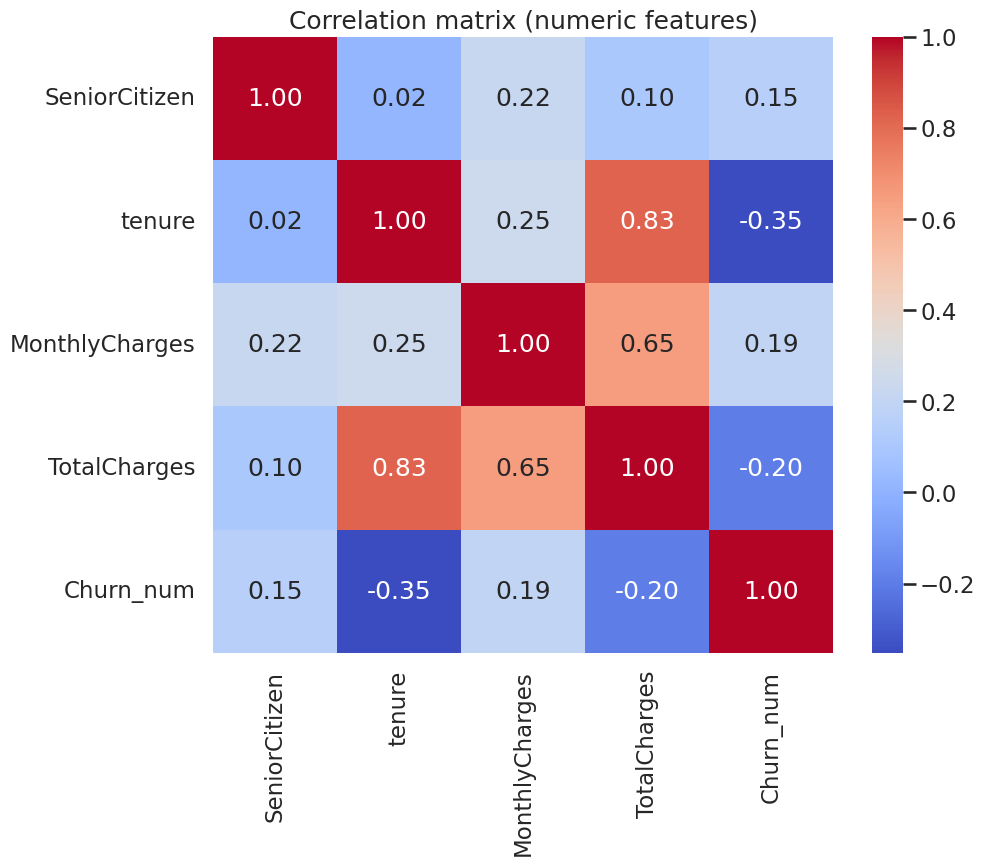

SeniorCitizen     0.150889
tenure           -0.352229
MonthlyCharges    0.193356
TotalCharges     -0.199037
Churn_num         1.000000
Name: Churn_num, dtype: float64
Correlation with Churn (numeric):


,Churn_num
Churn_num,1.000000
MonthlyCharges,0.193356
SeniorCitizen,0.150889
TotalCharges,-0.199037
tenure,-0.352229


In [38]:
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True,fmt=".2f", cmap="coolwarm")
plt.title("Correlation matrix (numeric features)")
plt.show()

# Assuming 'Churn_num' is the numeric representation of churn (0/1)
print(corr['Churn_num'])

# Correlation with Churn_num
print("Correlation with Churn (numeric):")
display(corr['Churn_num'].sort_values(ascending=False))

**Distribution Plots**

---



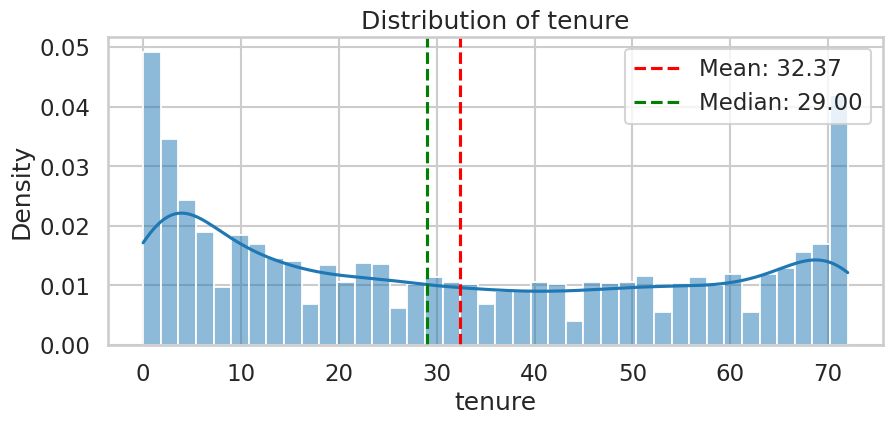

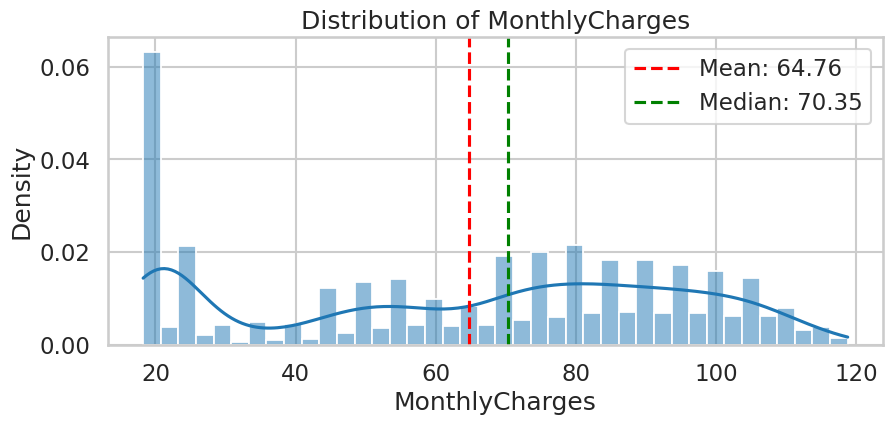

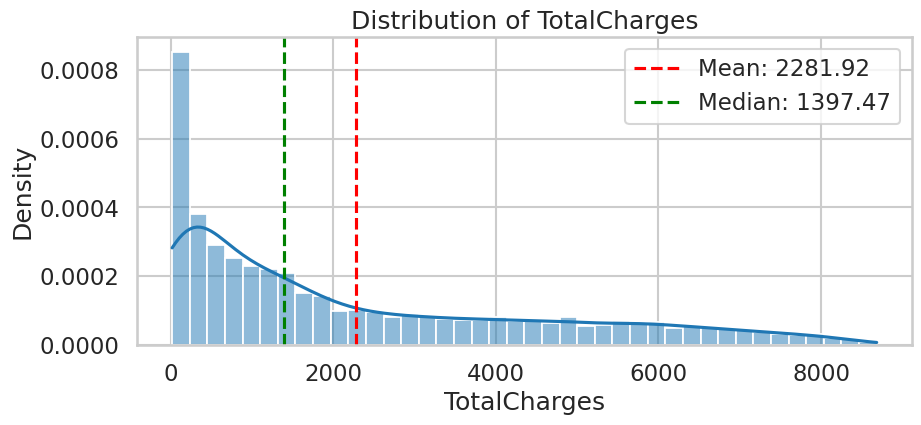

In [39]:
for col in ['tenure','MonthlyCharges','TotalCharges']:
    plt.figure(figsize=(10,4))
    sns.histplot(df_work[col], kde=True, stat='density', bins=40)
    mean = df_work[col].mean()
    med = df_work[col].median()
    plt.axvline(mean, color='red', linestyle='--', label=f"Mean: {mean:.2f}")
    plt.axvline(med, color='green', linestyle='--', label=f"Median: {med:.2f}")
    plt.title(f"Distribution of {col}")
    plt.legend()
    plt.show()



**Advanced EDA: Categorical Feature vs Churn**

---



/tmp/ipython-input-123705411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df,palette=['teal', 'orange'])


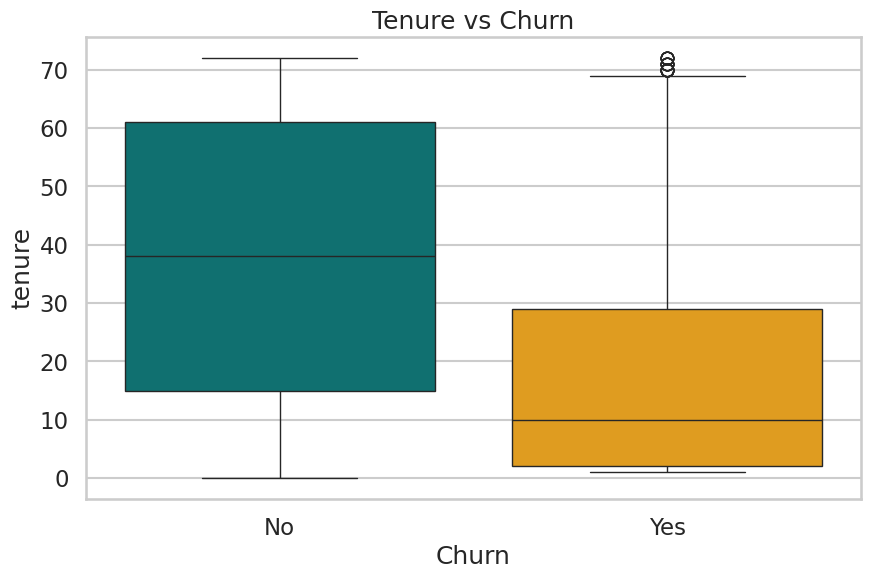


 Churners have much lower tenure!


In [40]:
# Tenure vs Churn
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='tenure', data=df,palette=['teal', 'orange'])
plt.title('Tenure vs Churn')
plt.show()
print("\n Churners have much lower tenure!")

/tmp/ipython-input-2673571852.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df,palette=['teal', 'orange'])


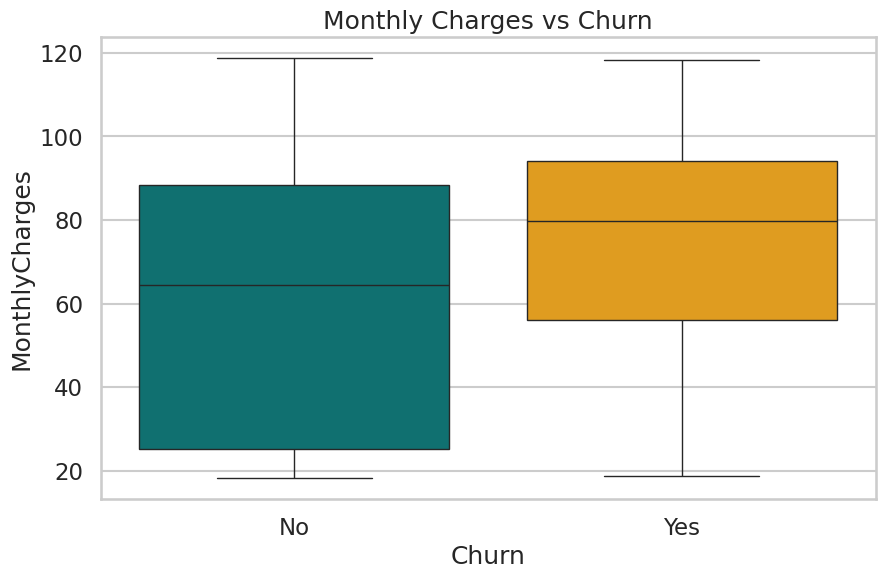


 Churners pay highly monthly charges!


In [41]:
# monthlyCharges vs Churn
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df,palette=['teal', 'orange'])
plt.title('Monthly Charges vs Churn')
plt.show()
print("\n Churners pay highly monthly charges!")

/tmp/ipython-input-2243130131.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='TotalCharges', data=df,palette=['teal', 'orange'])


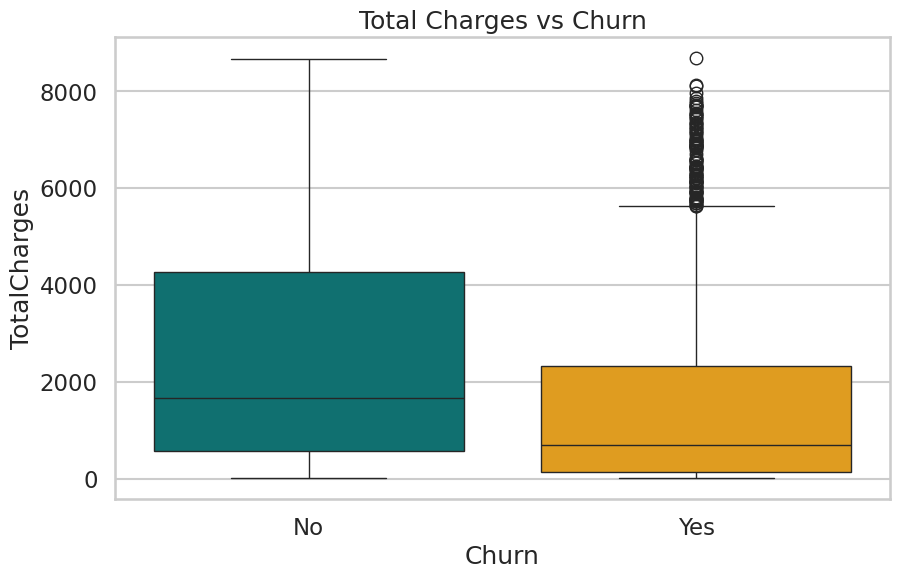

In [42]:
# TotalCharges vs Churn
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='TotalCharges', data=df,palette=['teal', 'orange'])
plt.title('Total Charges vs Churn')
plt.show()

/tmp/ipython-input-3495311956.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df_work,palette=['teal', 'orange'])
/tmp/ipython-input-3495311956.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df_work,palette=['teal', 'orange'])
/tmp/ipython-input-3495311956.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='TotalCharges', data=df_work,palette=['teal', 'orange'])


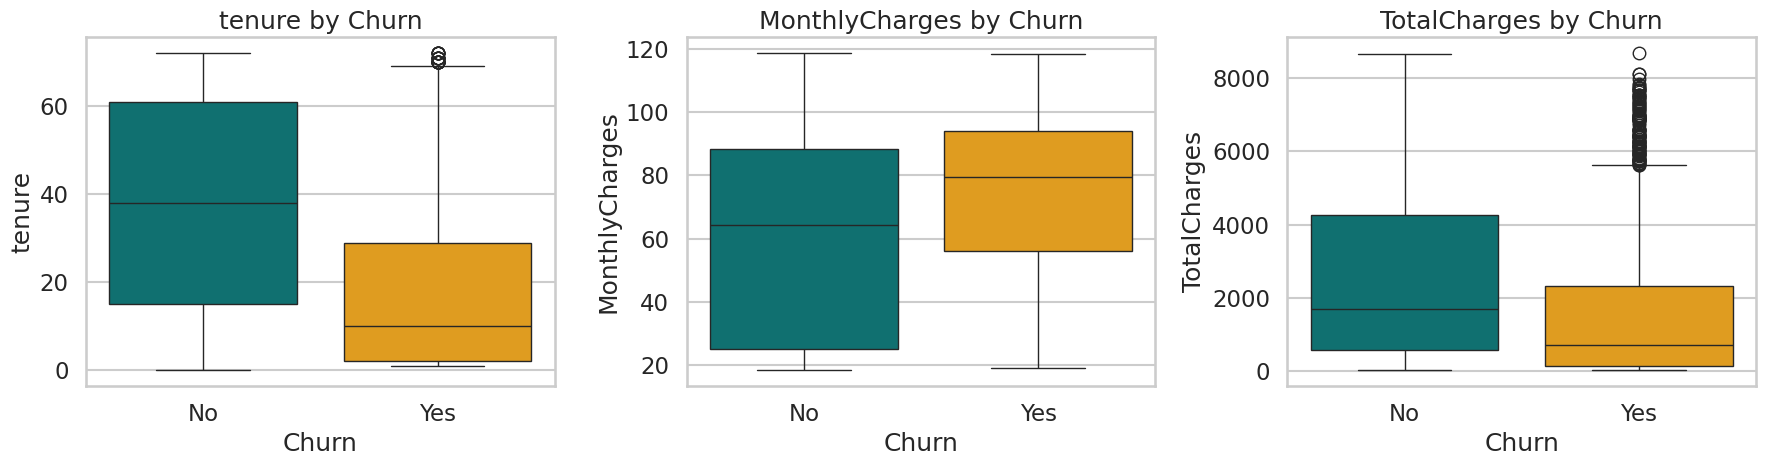

In [43]:
# Summary in one
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.boxplot(x='Churn', y='tenure', data=df_work,palette=['teal', 'orange'])
plt.title('tenure by Churn')

plt.subplot(1,3,2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_work,palette=['teal', 'orange'])
plt.title('MonthlyCharges by Churn')

plt.subplot(1,3,3)
sns.boxplot(x='Churn', y='TotalCharges', data=df_work,palette=['teal', 'orange'])
plt.title('TotalCharges by Churn')

plt.tight_layout()
plt.show()


**Key Categorical Features vs** **Churn**

---



<Figure size 1000x600 with 0 Axes>

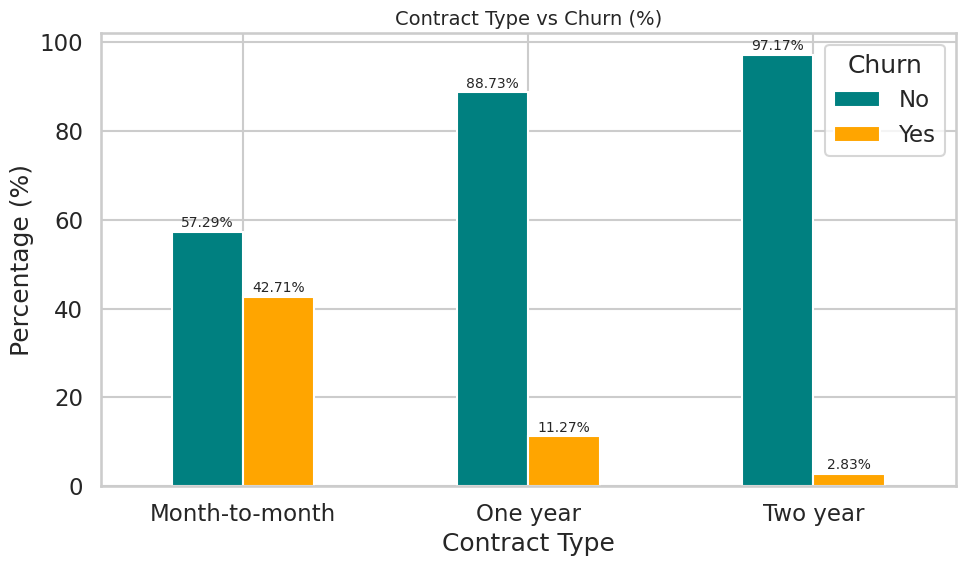


--- Contract churn rates (percent) ---


Churn,No,Yes
Contract,,
Month-to-month,57.29,42.71
One year,88.73,11.27
Two year,97.17,2.83



 Month-to-month -> Very high churn!


In [44]:
# Contract vs Churn (Bar Plot)

#computing percentage
ct = pd.crosstab(df_work['Contract'], df_work['Churn'], normalize='index')*100

plt.figure(figsize=(10,6))
ax = ct.plot(kind='bar', stacked=False, figsize=(10,6), color=['teal', 'orange'])
plt.title('Contract Type vs Churn (%)',fontsize=14)
plt.ylabel("Percentage (%)")
plt.xlabel("Contract Type")
plt.xticks(rotation=0)

for p in ax.patches:
    percentage = p.get_height()
    if percentage > 0:
        ax.text(p.get_x() + p.get_width()/2, percentage + 1, f"{percentage:.2f}%", ha='center', fontsize=10)

plt.legend(["No", "Yes"], title="Churn")
plt.tight_layout()
plt.show()

# Top features to show as tables
top_predictors = ['Contract']
for col in top_predictors:
    if col in df_work.columns:
        print(f"\n--- {col} churn rates (percent) ---")
        display((pd.crosstab(df_work[col], df_work['Churn'], normalize='index')*100).round(2))

print("\n Month-to-month -> Very high churn!")




<Figure size 1000x600 with 0 Axes>

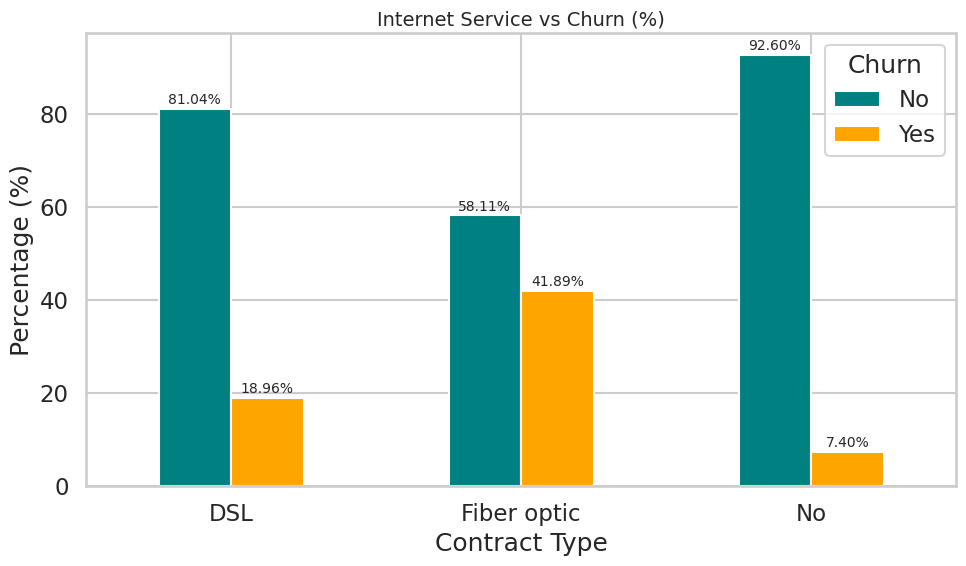


--- InternetService churn rates (percent) ---


Churn,No,Yes
InternetService,,
DSL,81.04,18.96
Fiber optic,58.11,41.89
No,92.60,7.40



 Fiber optic -> Very high churn!


In [45]:
# Internet Service vs Churn
ct = pd.crosstab(df_work['InternetService'], df_work['Churn'], normalize='index')*100

plt.figure(figsize=(10,6))
ax = ct.plot(kind='bar', stacked=False, figsize=(10,6), color=['teal', 'orange'])
plt.title('Internet Service vs Churn (%)',fontsize=14)
plt.ylabel("Percentage (%)")
plt.xlabel("Contract Type")
plt.xticks(rotation=0)

for p in ax.patches:
    percentage = p.get_height()
    if percentage > 0:
        ax.text(p.get_x() + p.get_width()/2, percentage + 1, f"{percentage:.2f}%", ha='center', fontsize=10)

plt.legend(["No", "Yes"], title="Churn")
plt.tight_layout()
plt.show()

# Top features to show as tables
top_predictors = ['InternetService']
for col in top_predictors:
    if col in df_work.columns:
        print(f"\n--- {col} churn rates (percent) ---")
        display((pd.crosstab(df_work[col], df_work['Churn'], normalize='index')*100).round(2))

print("\n Fiber optic -> Very high churn!")

<Figure size 1000x600 with 0 Axes>

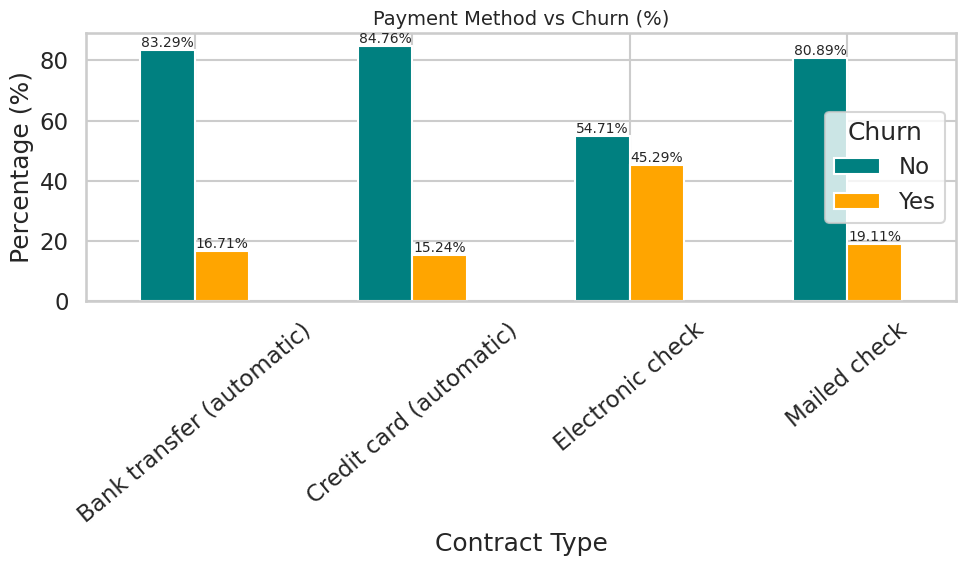


--- PaymentMethod churn rates (percent) ---


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.29,16.71
Credit card (automatic),84.76,15.24
Electronic check,54.71,45.29
Mailed check,80.89,19.11



 Electronic check -> Very high churn!


In [46]:
# PaymentMethod vs Churn
ct = pd.crosstab(df_work['PaymentMethod'], df_work['Churn'], normalize='index')*100

plt.figure(figsize=(10,6))
ax = ct.plot(kind='bar', stacked=False, figsize=(10,6), color=['teal', 'orange'])
plt.title('Payment Method vs Churn (%)',fontsize=14)
plt.ylabel("Percentage (%)")
plt.xlabel("Contract Type")
plt.xticks(rotation=40)

for p in ax.patches:
    percentage = p.get_height()
    if percentage > 0:
        ax.text(p.get_x() + p.get_width()/2, percentage + 1, f"{percentage:.2f}%", ha='center', fontsize=10)

plt.legend(["No", "Yes"], title="Churn")
plt.tight_layout()
plt.show()

# Top features to show as tables
top_predictors = ['PaymentMethod']
for col in top_predictors:
    if col in df_work.columns:
        print(f"\n--- {col} churn rates (percent) ---")
        display((pd.crosstab(df_work[col], df_work['Churn'], normalize='index')*100).round(2))

print("\n Electronic check -> Very high churn!")

<Figure size 1000x600 with 0 Axes>

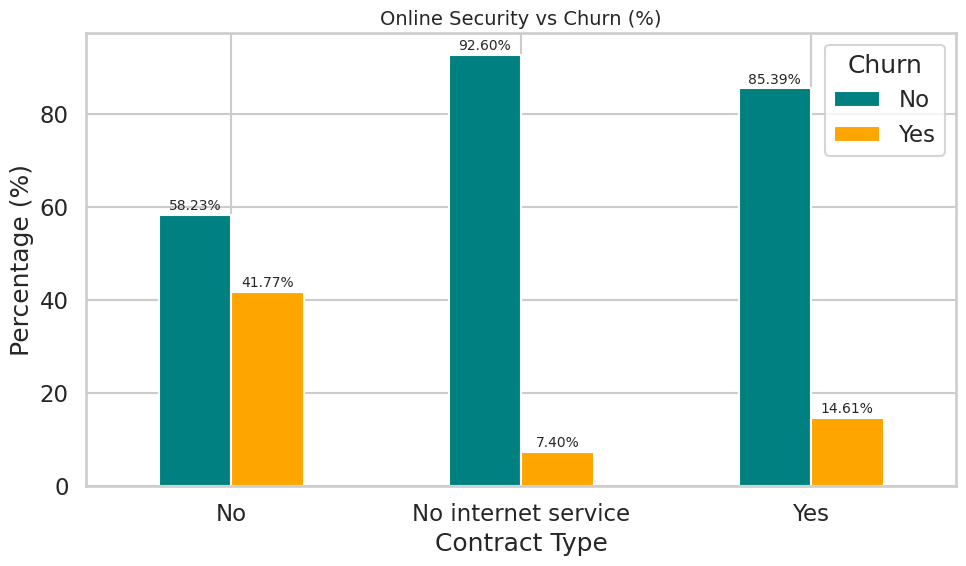


--- OnlineSecurity churn rates (percent) ---


Churn,No,Yes
OnlineSecurity,,
No,58.23,41.77
No internet service,92.60,7.40
Yes,85.39,14.61


In [47]:
# OnlineSecurity vs Churn
ct = pd.crosstab(df_work['OnlineSecurity'], df_work['Churn'], normalize='index')*100

plt.figure(figsize=(10,6))
ax = ct.plot(kind='bar', stacked=False, figsize=(10,6), color=['teal', 'orange'])
plt.title('Online Security vs Churn (%)',fontsize=14)
plt.ylabel("Percentage (%)")
plt.xlabel("Contract Type")
plt.xticks(rotation=0)

for p in ax.patches:
    percentage = p.get_height()
    if percentage > 0:
        ax.text(p.get_x() + p.get_width()/2, percentage + 1, f"{percentage:.2f}%", ha='center', fontsize=10)

plt.legend(["No", "Yes"], title="Churn")
plt.tight_layout()
plt.show()

# Top features to show as tables
top_predictors = ['OnlineSecurity']
for col in top_predictors:
    if col in df_work.columns:
        print(f"\n--- {col} churn rates (percent) ---")
        display((pd.crosstab(df_work[col], df_work['Churn'], normalize='index')*100).round(2))

<Figure size 1000x600 with 0 Axes>

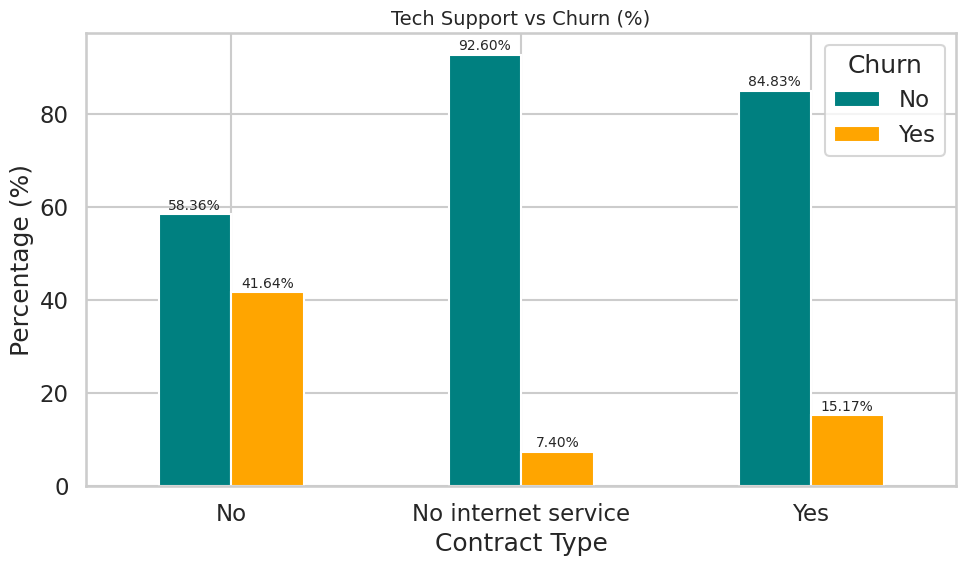


--- TechSupport churn rates (percent) ---


Churn,No,Yes
TechSupport,,
No,58.36,41.64
No internet service,92.60,7.40
Yes,84.83,15.17


In [48]:
# TechSupport vs Churn
ct = pd.crosstab(df_work['TechSupport'], df_work['Churn'], normalize='index')*100

plt.figure(figsize=(10,6))
ax = ct.plot(kind='bar', stacked=False, figsize=(10,6), color=['teal', 'orange'])
plt.title('Tech Support vs Churn (%)',fontsize=14)
plt.ylabel("Percentage (%)")
plt.xlabel("Contract Type")
plt.xticks(rotation=0)

for p in ax.patches:
    percentage = p.get_height()
    if percentage > 0:
        ax.text(p.get_x() + p.get_width()/2, percentage + 1, f"{percentage:.2f}%", ha='center', fontsize=10)

plt.legend(["No", "Yes"], title="Churn")
plt.tight_layout()
plt.show()

# Top features to show as tables
top_predictors = ['TechSupport']
for col in top_predictors:
    if col in df_work.columns:
        print(f"\n--- {col} churn rates (percent) ---")
        display((pd.crosstab(df_work[col], df_work['Churn'], normalize='index')*100).round(2))

<Figure size 1000x600 with 0 Axes>

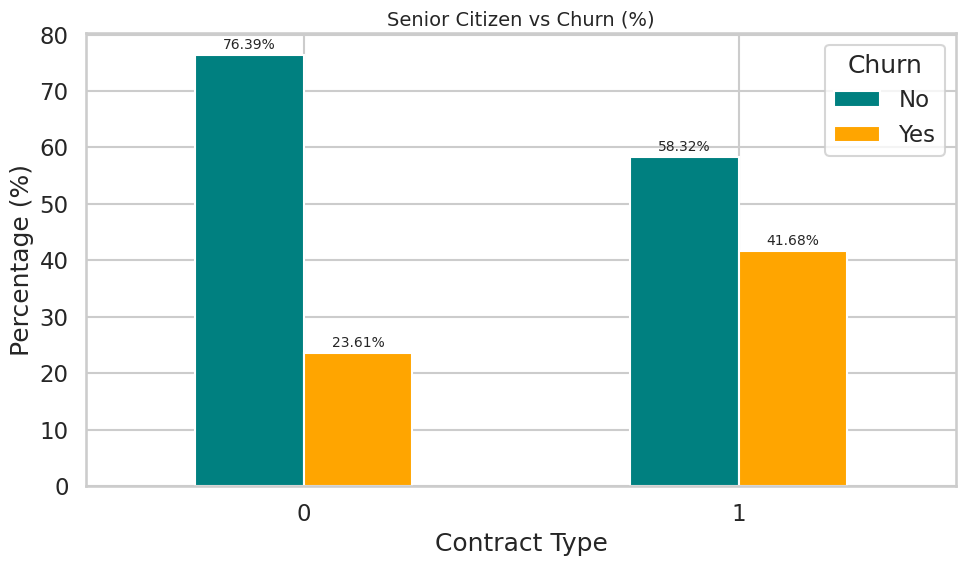


--- SeniorCitizen churn rates (percent) ---


Churn,No,Yes
SeniorCitizen,,
0,76.39,23.61
1,58.32,41.68


Senior citizens churn more!


In [49]:
# SeniorCitizen vs Churn
ct = pd.crosstab(df_work['SeniorCitizen'], df_work['Churn'], normalize='index')*100

plt.figure(figsize=(10,6))
ax = ct.plot(kind='bar', stacked=False, figsize=(10,6), color=['teal', 'orange'])
plt.title('Senior Citizen vs Churn (%)',fontsize=14)
plt.ylabel("Percentage (%)")
plt.xlabel("Contract Type")
plt.xticks(rotation=0)

for p in ax.patches:
    percentage = p.get_height()
    if percentage > 0:
        ax.text(p.get_x() + p.get_width()/2, percentage + 1, f"{percentage:.2f}%", ha='center', fontsize=10)

plt.legend(["No", "Yes"], title="Churn")
plt.tight_layout()
plt.show()

# Top features to show as tables
top_predictors = ['SeniorCitizen']
for col in top_predictors:
    if col in df_work.columns:
        print(f"\n--- {col} churn rates (percent) ---")
        display((pd.crosstab(df_work[col], df_work['Churn'], normalize='index')*100).round(2))
print("Senior citizens churn more!")

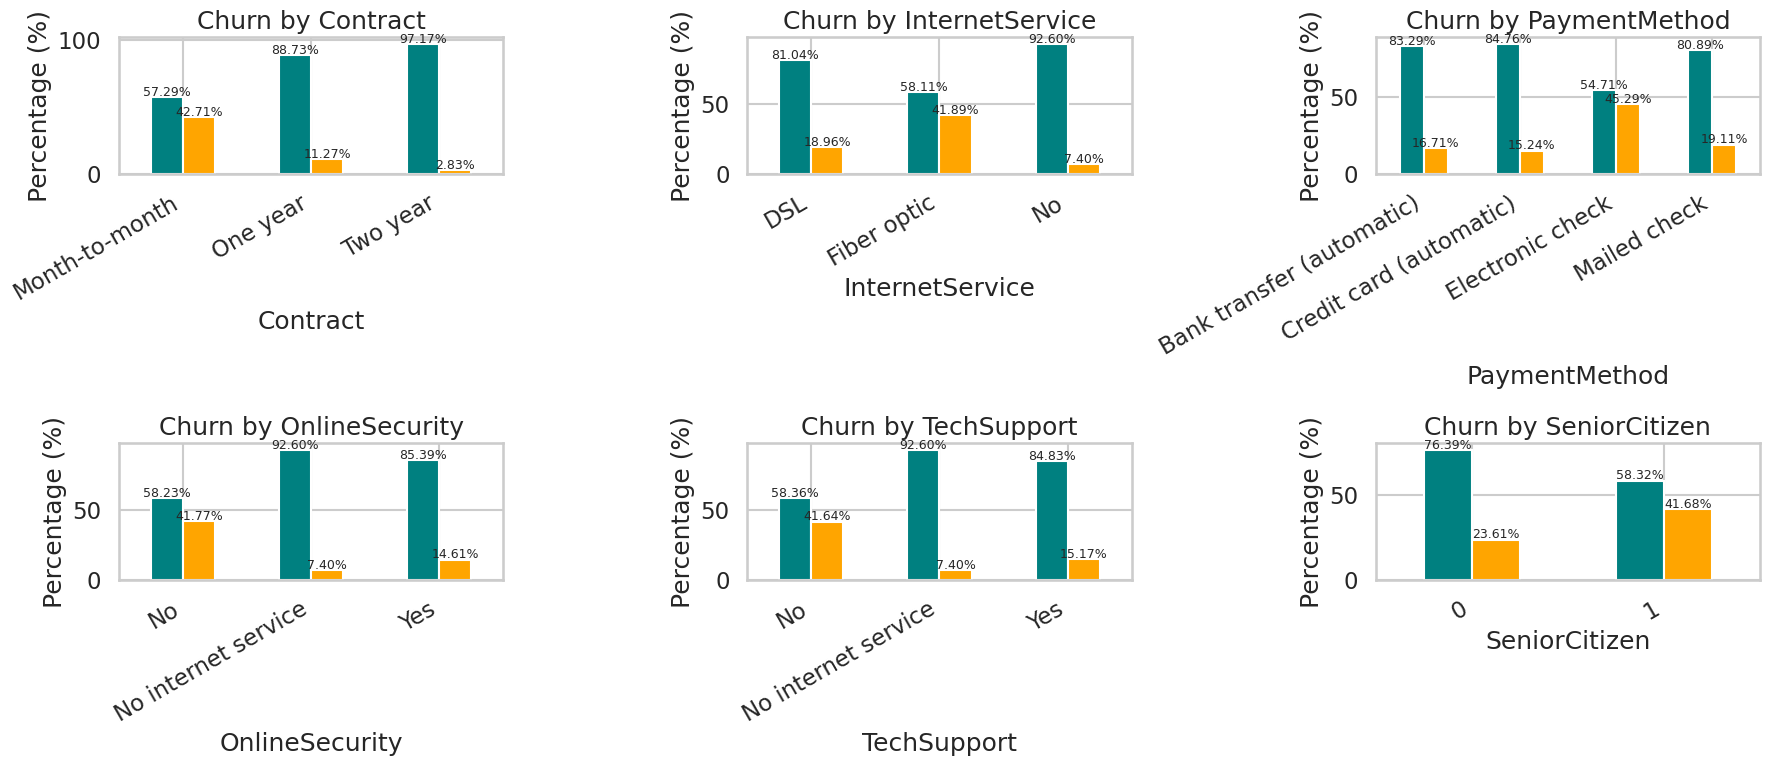

In [50]:
# Summary in one
selected = [c for c in ['Contract','InternetService','PaymentMethod','OnlineSecurity','TechSupport','SeniorCitizen'] if c in df_work.columns]

n = len(selected)
cols = 3
rows = (n+cols-1)//cols
fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*4))
axes = axes.flatten()

for ax, col in zip(axes, selected):
    ct = pd.crosstab(df_work[col], df_work['Churn'], normalize='index')*100
    ct.plot(kind='bar', stacked=False, ax=ax, color=['teal', 'orange'], legend=False)
    ax.set_title(f"Churn by {col}")
    ax.set_ylabel("Percentage (%)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    # annotate
    for p in ax.patches:
        h = p.get_height()
        if h > 0:
            ax.text(p.get_x()+p.get_width()/2, h+0.8, f"{h:.2f}%", ha='center', fontsize=9)
# remove unused axes
for i in range(len(selected), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()


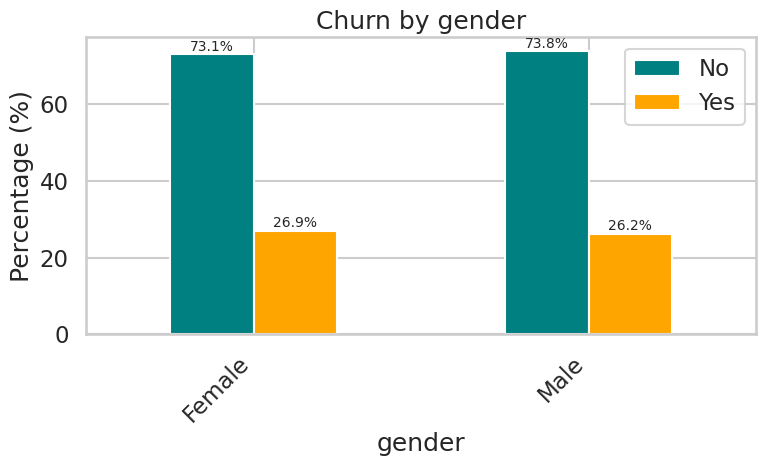

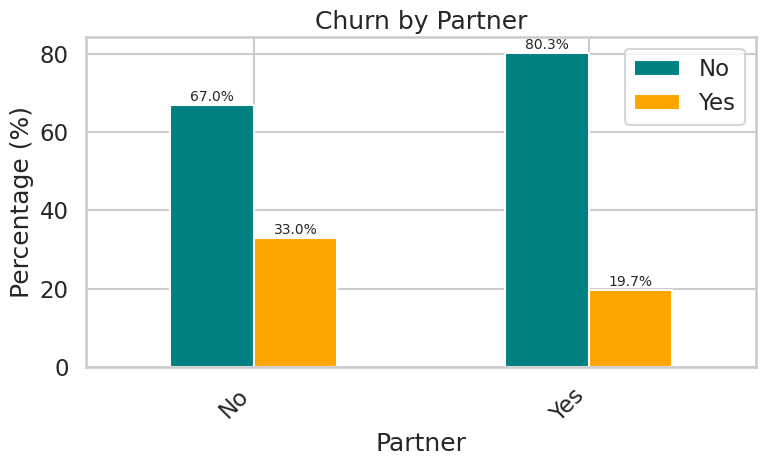

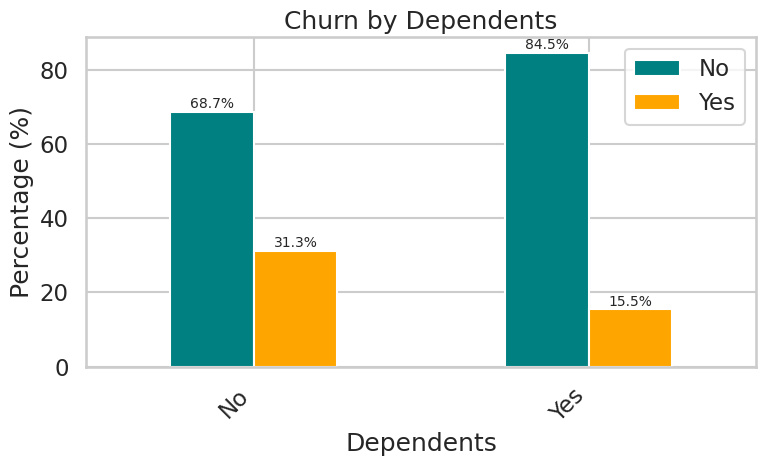

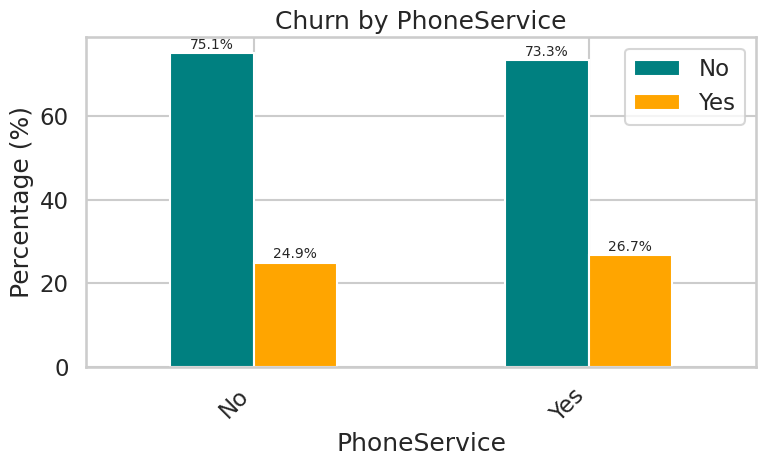

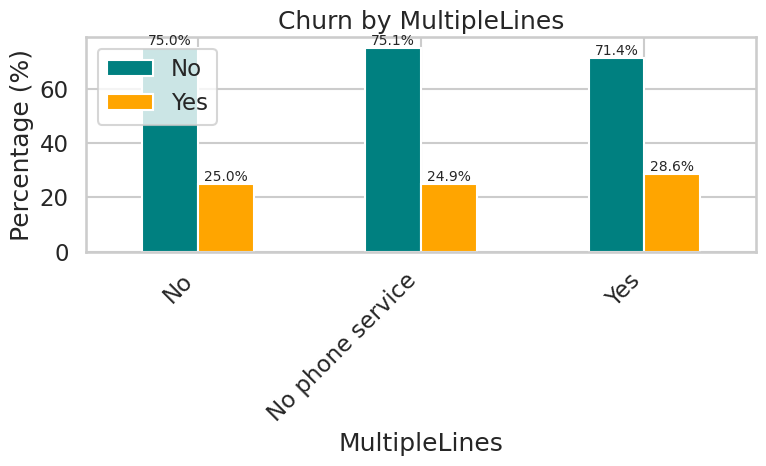

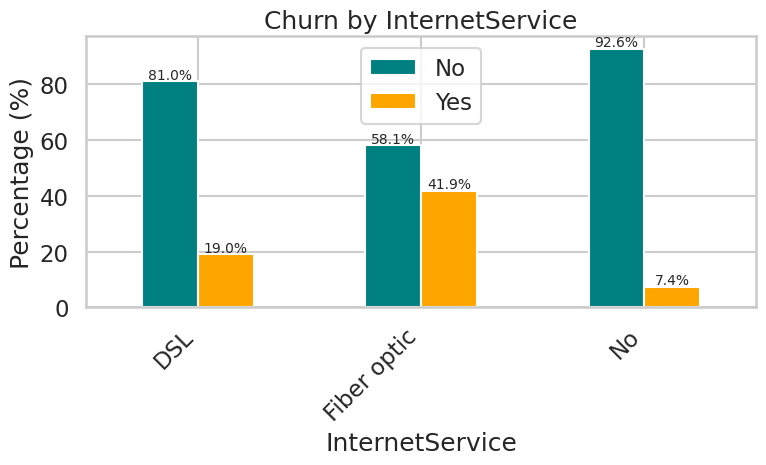

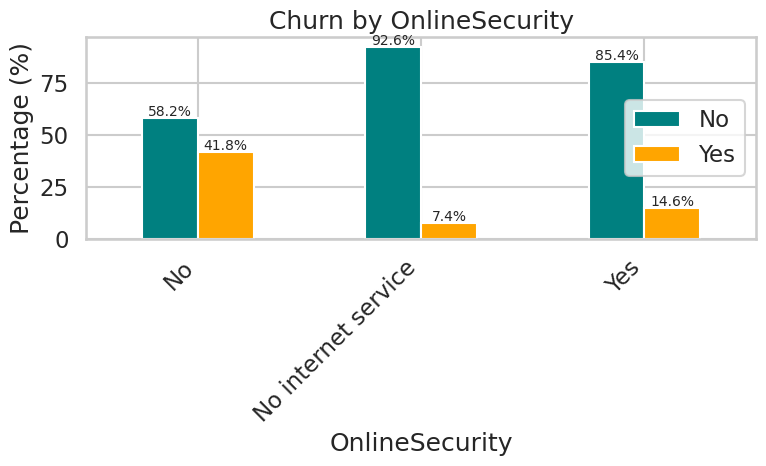

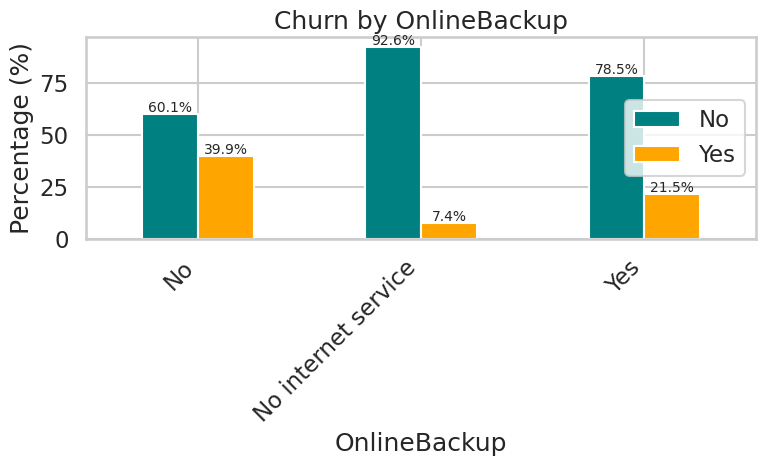

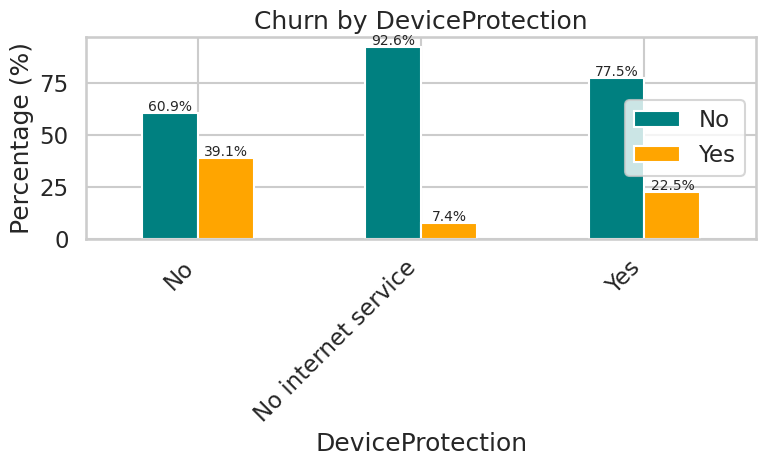

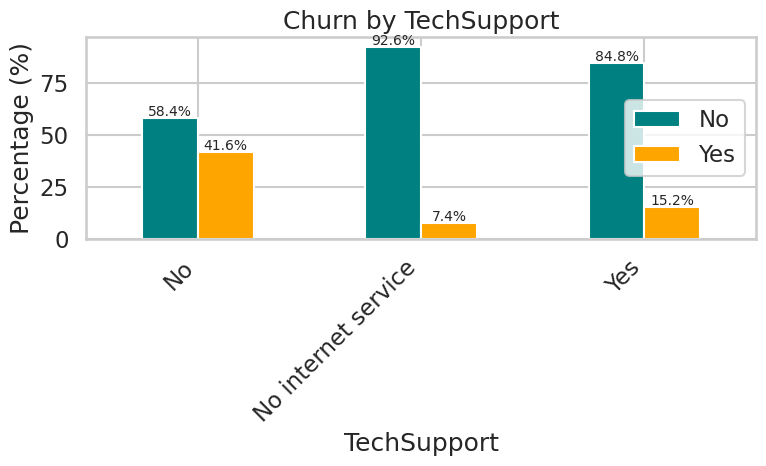

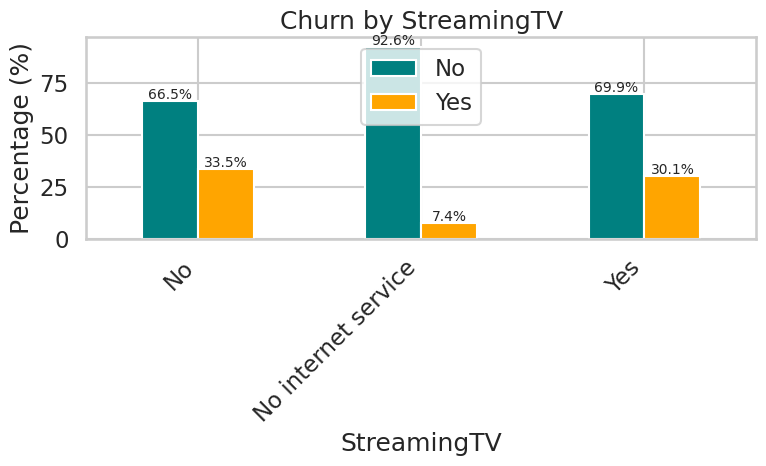

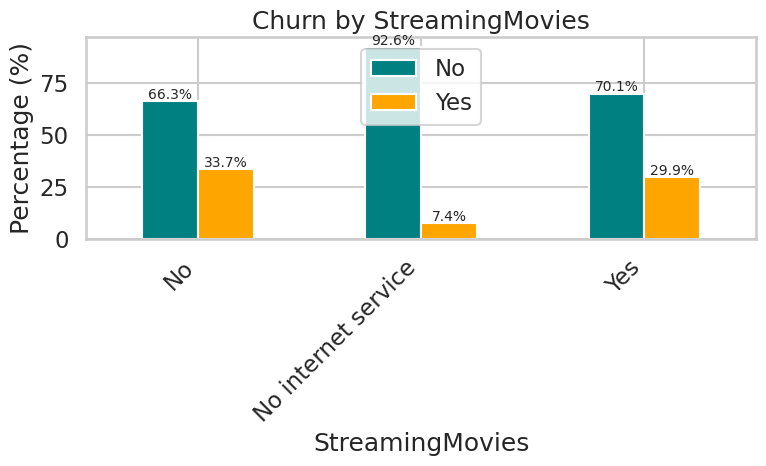

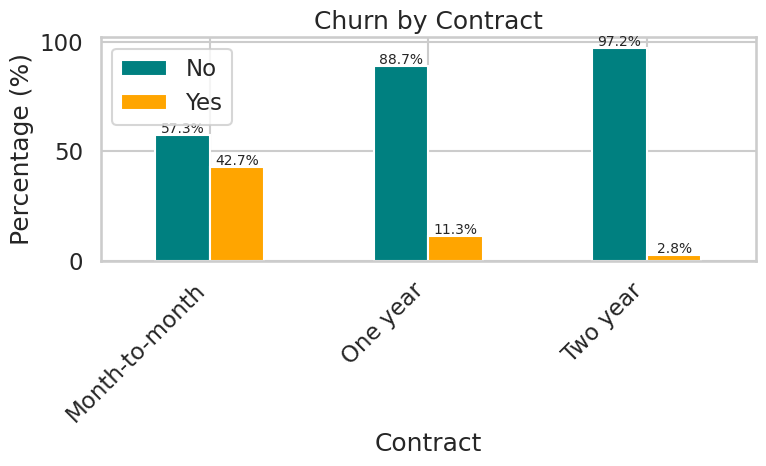

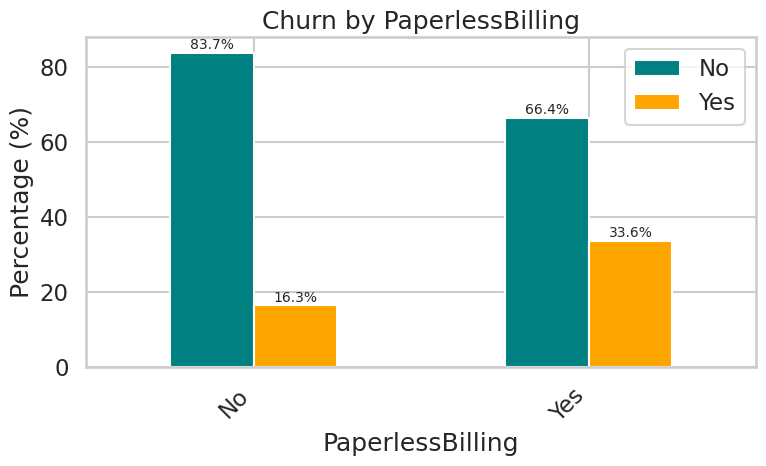

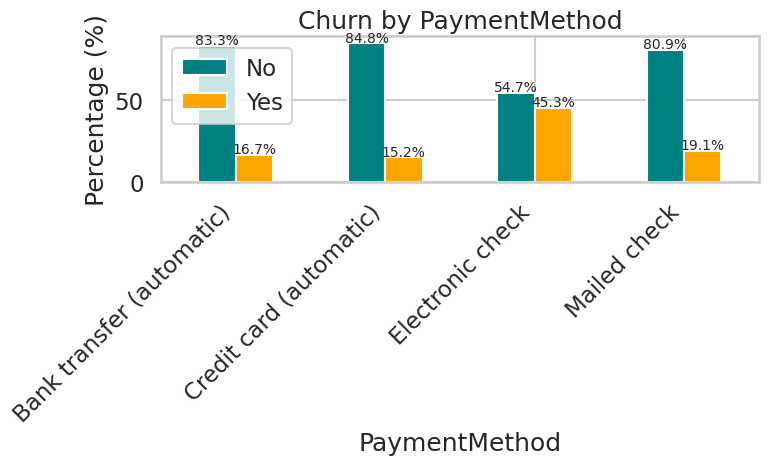

In [51]:
# compute percentage churn per category for each categorical variable
cat_cols = cat_cols.copy()
if 'Churn' in cat_cols:
    cat_cols.remove('Churn')  # exclude target

for col in cat_cols:
    ct = pd.crosstab(df_work[col], df_work['Churn'], normalize='index')*100
    ax = ct.plot(kind='bar', stacked=False, figsize=(8,5), color=['teal','orange'])
    plt.title(f"Churn by {col}")
    plt.ylabel("Percentage (%)")
    plt.xticks(rotation=45, ha='right')
    # annotate percentages
    for p in ax.patches:
        h = p.get_height()
        if h > 0:
            ax.text(p.get_x() + p.get_width()/2, h + 1, f"{h:.1f}%", ha='center', fontsize=10)
    plt.legend(["No","Yes"])
    plt.tight_layout()
    plt.show()


# Initial Findings

*   **Dataset Overview**: 7043 rows and 21 columns after cleaning. No missing values or duplicate values.

*   **Churn is imbalced** : 26.5% churn(Yes=1), 73.5% churn(No=0). Use stratified split and metrics like F1/ROC-AUC for evaluation

*   **Numerical Features(3)**:


1.   **Tenure**: Low tenure(<10 months) has high churn(short-term customers leave). Mean tenure=32 months, but churners average ~ 18 months.

2.   **MonthlyCharges**: Higher charges(>$70) correlate with churn(r=0.19). Churners pay more on average.

3.   **TotalCharges**: Lower for churners(due to short tenure). Weak correlation with churn (r=0.20)



*   **Categorical Features(17):**

1.   **Contract:** Month-to-month has ~40% churn vs. 11% one-year and ~3% two-year. Recommend contract incentives.

2.   **InternetService**: Fiber optic has ~42% churn(expensive/unrelialable), DSL ~19%, No internet ~7%. Target fiber users.

3.   **PayementMethod:** Electronic check has ~45% churn vs ~15-20% for auto methods. Push auto-payments.

4.   **SeniorCitizen:** Senior churn at ~42% vs ~24% non-seniors. Age specific retention

5.   **Other:** No stronger gender bias. MultipleLines/Streaming increase churn slightly if present

*   **Overall Patterns**: Churn driven by short contracts, high charges, fiber service, manual payments. Correlation show tenure as protective (r=0.35 with churn). For models: Expect DT to highlight these features; NN for complex interactions.






